## 04.04.2022

# <center>Извлечение признаков из временного ряда</center>

In [62]:
import numpy as np
import pandas as pd
import math
from scipy import optimize

import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
passengers = pd.read_csv('C:/Users/mag/passengers.csv', index_col=0, parse_dates=True)

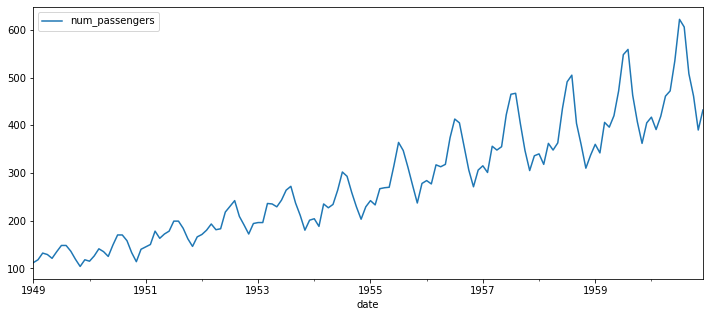

In [14]:
passengers.plot(figsize=(12,5))
plt.show()

### 2.2. Описание сезонного периода с помощью Фурье-преобразования

In [15]:
passengers.index.month

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
             3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
           dtype='int64', name='date', length=144)

In [16]:
passengers['month'] = passengers.index.month

In [17]:
passengers

,num_passengers,month
date,,
1949-01-01,112,1
1949-02-01,118,2
1949-03-01,132,3
1949-04-01,129,4
1949-05-01,121,5
...,...,...
1960-08-01,606,8
1960-09-01,508,9
1960-10-01,461,10


In [18]:
passengers['x0'] = 1

In [19]:
passengers

,num_passengers,month,x0
date,,,
1949-01-01,112,1,1
1949-02-01,118,2,1
1949-03-01,132,3,1
1949-04-01,129,4,1
1949-05-01,121,5,1
...,...,...,...
1960-08-01,606,8,1
1960-09-01,508,9,1
1960-10-01,461,10,1


In [23]:
passengers['num'] = range(0, len(passengers))

In [24]:
passengers

,num_passengers,month,x0,num
date,,,,
1949-01-01,112,1,1,0
1949-02-01,118,2,1,1
1949-03-01,132,3,1,2
1949-04-01,129,4,1,3
1949-05-01,121,5,1,4
...,...,...,...,...
1960-08-01,606,8,1,139
1960-09-01,508,9,1,140
1960-10-01,461,10,1,141


In [87]:
passengers['sin'] = np.sin((2*np.pi*(passengers['num']))/12)

In [88]:
passengers

,num_passengers,month,x0,num,sin,cos
date,,,,,,
1949-01-01,112,1,1,0,0.000000,1.000000e+00
1949-02-01,118,2,1,1,0.500000,-1.000000e+00
1949-03-01,132,3,1,2,0.866025,-5.000000e-01
1949-04-01,129,4,1,3,1.000000,-1.836970e-16
1949-05-01,121,5,1,4,0.866025,3.090170e-01
...,...,...,...,...,...,...
1960-08-01,606,8,1,139,-0.500000,-7.071068e-01
1960-09-01,508,9,1,140,-0.866025,-9.396926e-01
1960-10-01,461,10,1,141,-1.000000,8.090170e-01


In [89]:
passengers['cos'] = np.cos((2*np.pi*(passengers['num']))/12)

In [90]:
passengers

,num_passengers,month,x0,num,sin,cos
date,,,,,,
1949-01-01,112,1,1,0,0.000000,1.000000e+00
1949-02-01,118,2,1,1,0.500000,8.660254e-01
1949-03-01,132,3,1,2,0.866025,5.000000e-01
1949-04-01,129,4,1,3,1.000000,6.123234e-17
1949-05-01,121,5,1,4,0.866025,-5.000000e-01
...,...,...,...,...,...,...
1960-08-01,606,8,1,139,-0.500000,-8.660254e-01
1960-09-01,508,9,1,140,-0.866025,-5.000000e-01
1960-10-01,461,10,1,141,-1.000000,-1.175970e-14


In [91]:
def mse (teta1, teta2, teta3, teta4):
    return np.mean((-teta2 * passengers['num'] - teta3 * passengers['sin'] - teta4 * passengers['cos'] - teta1 * passengers['x0'] + passengers['num_passengers'])**2)

In [92]:
res = optimize.minimize(lambda x: mse(x[0], x[1], x[2], x[3]),(1,1,1,1))
res

      fun: 1042.0664148570786
 hess_inv: array([[ 7.70991956e-02, -7.17286952e-04,  4.27780696e-02,
        -1.15681625e-01],
       [-7.17286952e-04,  5.31984842e-05, -4.21990204e-04,
         1.06756017e-03],
       [ 4.27780696e-02, -4.21990204e-04,  2.84266174e-02,
        -6.29693340e-02],
       [-1.15681625e-01,  1.06756017e-03, -6.29693340e-02,
         1.77069358e-01]])
      jac: array([0.00000000e+00, 6.10351562e-05, 0.00000000e+00, 0.00000000e+00])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 150
      nit: 16
     njev: 30
   status: 2
  success: False
        x: array([ 90.83236846,   2.64987761,   5.42625996, -45.49951394])

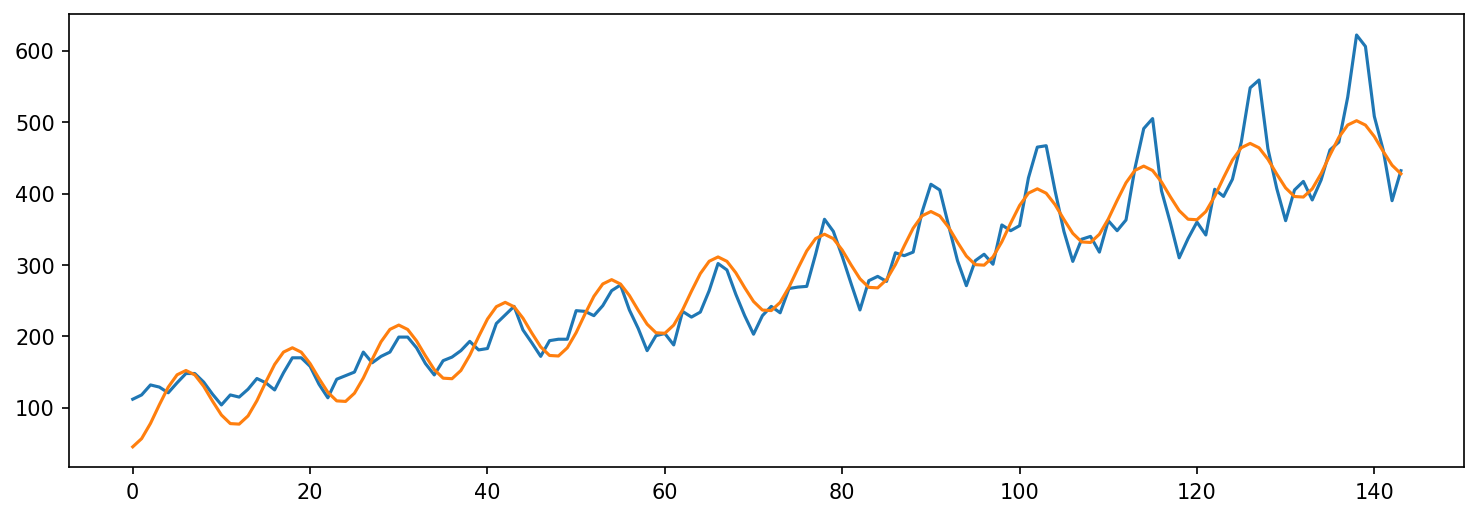

In [93]:
plt.figure(figsize=(12,4), dpi = 150)
plt.plot(passengers['num_passengers'].values)
plt.plot(np.dot(passengers.loc[:, 'x0':], res.x))

In [94]:
passengers

,num_passengers,month,x0,num,sin,cos
date,,,,,,
1949-01-01,112,1,1,0,0.000000,1.000000e+00
1949-02-01,118,2,1,1,0.500000,8.660254e-01
1949-03-01,132,3,1,2,0.866025,5.000000e-01
1949-04-01,129,4,1,3,1.000000,6.123234e-17
1949-05-01,121,5,1,4,0.866025,-5.000000e-01
...,...,...,...,...,...,...
1960-08-01,606,8,1,139,-0.500000,-8.660254e-01
1960-09-01,508,9,1,140,-0.866025,-5.000000e-01
1960-10-01,461,10,1,141,-1.000000,-1.175970e-14


In [111]:
x0 = pd.DataFrame(np.ones(36))

In [112]:
x0

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0
7,1.0
8,1.0
9,1.0


In [109]:
num = range(180)

In [110]:
num

range(0, 180)